In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [2]:
def plot(x, scale = 1):
    scale = float(scale)
    plt.scatter(x[:,0], x[:,1], )
    plt.xlim([-scale, scale])
    plt.ylim([-scale, scale])

In [3]:
L = 1
tmax = torch.tensor(1.0)
tmin = torch.tensor(0.01)
std_max = L * torch.sqrt(tmax)
std_min = L * torch.sqrt(tmin)
print(std_max, std_min)

tensor(1.) tensor(0.1000)


# Init

tensor(0.9995)


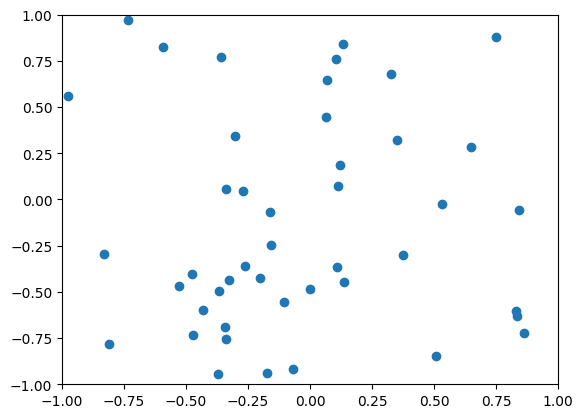

In [4]:
N = 100
x0 = torch.randn(N, 2) * std_max
print(x0.std())
plot(x0)

# Langevin

100%|██████████| 10000/10000 [00:00<00:00, 62896.23it/s]


tensor(0.1009) tensor(0.1000)
tensor(-0.0012)


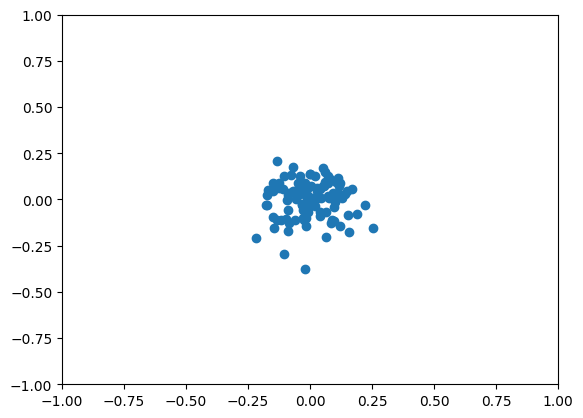

In [10]:
t = tmin
dt = torch.tensor(0.001)

x = x0.clone()
for i in tqdm(range(10000)):
    score_dimensionless = -x / (L*torch.sqrt(t))
    score = score_dimensionless / (L*torch.sqrt(t))
    noise = torch.randn_like(score) * torch.sqrt(dt)

    x = x + 0.5*score*dt + noise

print(x.std(), std_min)
plot(x)

# Yang Song

100%|██████████| 1000/1000 [00:00<00:00, 57934.78it/s]

tensor(0.3358) tensor(0.1000)


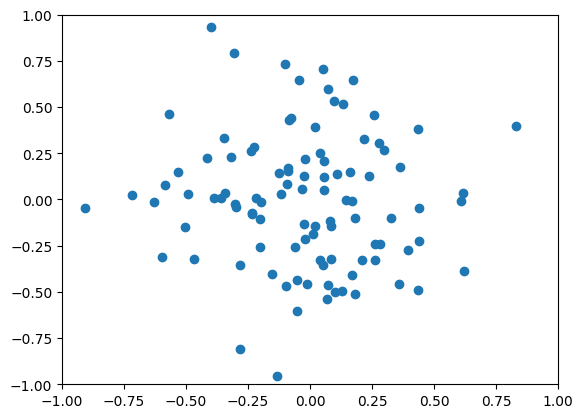

In [44]:
t_schedule = torch.linspace(tmax, tmin, steps = 1000)
dt_schedule = 0.01 * (L**2) * t_schedule 

x = x0.clone()
for i in tqdm(range(len(t_schedule[:]))):
    t = t_schedule[i]
    dt = dt_schedule[i]

    score_dimensionless = -x / (L*torch.sqrt(t))
    score = score_dimensionless / (L*torch.sqrt(t))
    noise = torch.randn_like(score) * torch.sqrt(dt)

    x = x + 0.5*score*dt + noise

print(x.std(), std_min)
plot(x)

# Yang Song Logscale

100%|██████████| 1000/1000 [00:00<00:00, 57401.96it/s]

tensor(0.1050) tensor(0.1000)


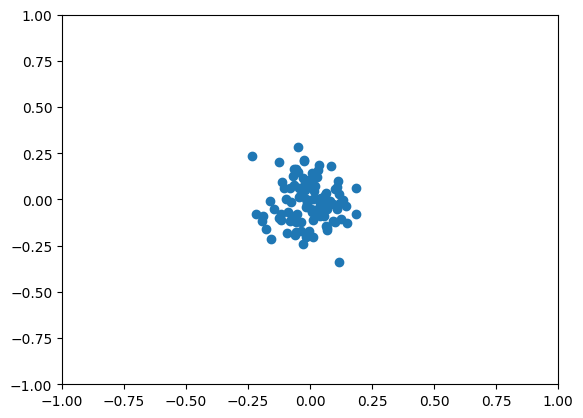

In [45]:
t_schedule = torch.logspace(torch.log(tmax), torch.log(tmin), base=torch.e, steps = 1000)
dt_schedule = 0.02 * (L**2) * t_schedule 

x = x0.clone()
for i in tqdm(range(len(t_schedule[:]))):
    t = t_schedule[i]
    dt = dt_schedule[i]

    score_dimensionless = -x / (L*torch.sqrt(t))
    score = score_dimensionless / (L*torch.sqrt(t))
    noise = torch.randn_like(score) * torch.sqrt(dt)

    x = x + 0.5*score*dt + noise

print(x.std(), std_min)
plot(x)

# Working

100%|██████████| 1000/1000 [00:00<00:00, 58284.98it/s]

tensor(0.0602) tensor(0.1000)


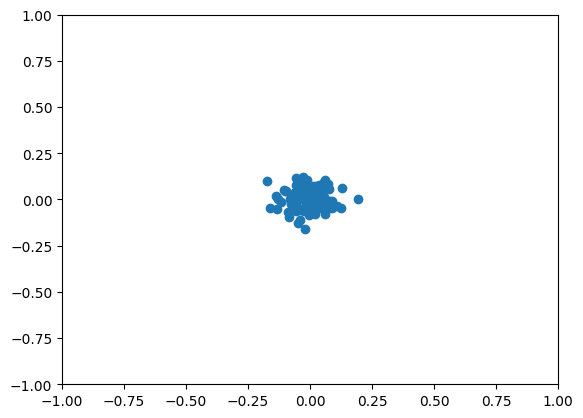

In [37]:
t_schedule = torch.linspace(tmax, tmin, steps = 1000)
dt_schedule = 0.01 * torch.ones_like(t_schedule)

x = x0.clone()
for i in tqdm(range(len(t_schedule[:]))):
    t = t_schedule[i]
    dt = dt_schedule[i]

    score_dimensionless = -x / (L*torch.sqrt(t))
    # score = score_dimensionless / (L*torch.sqrt(t))
    disp = score_dimensionless * 0.5 * dt
    noise = torch.randn_like(score_dimensionless) * torch.sqrt(dt * t)

    x = x + L* (disp + noise)

print(x.std(), std_min)
plot(x)

In [ ]:
0.03

In [ ]:
x = x0.clone()

# t_schedule = torch.linspace(1., 0.01, steps = 1000)
# dt_schedule = 0.01 * torch.ones_like(t_schedule)

# for i in tqdm(range(len(t_schedule[:]))):
#     t = t_schedule[i]
#     dt = dt_schedule[i]

#     score_unnormalized = -x
#     # score = score_unnormalized / std**2
#     disp = score_unnormalized * 0.5 * dt
#     noise = torch.randn_like(score_unnormalized) * torch.sqrt(dt * t)

#     x = x + L* (disp + noise)

# dt = dt*0.1
# print(t,dt)
# time.sleep(0.1)
# for i in tqdm(range(10000)):
#     # t = t_schedule[-1]
#     # dt = dt_schedule[-1]

#     score_unnormalized = -x
#     score = score_unnormalized / (L**2 * t)
#     noise = torch.randn_like(score) * torch.sqrt(dt)

#     x = x + 0.5*score*dt + noise

In [ ]:
print(x.std(), L*torch.sqrt(t))

In [ ]:
plot(x)